<a href="https://colab.research.google.com/github/somayyehReza/somayyehReza/blob/main/5PINN6mmpde_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import math
self=object
class NN:
    def __init__(self,input_nodes,hidden1_nodes,hidden2_nodes,output_nodes,learning_rate):
        self.input_nodes=input_nodes
        self.hidden1_nodes=hidden1_nodes
        self.hidden2_nodes=hidden2_nodes
        self.output_nodes=output_nodes
        self.learning_rate=learning_rate
        self.tw_i_h1=np.random.rand(self.hidden1_nodes,self.input_nodes)
        self.xw_i_h1=np.random.rand(self.hidden1_nodes,self.input_nodes)
        self.w_h1_h2=np.random.rand(self.hidden2_nodes,self.hidden1_nodes)
        self.w_o_h2=np.random.rand(self.output_nodes,self.hidden2_nodes)
        self.error=np.zeros((10,1))
    def train(self,x,y,t):
        self.x=x
        self.y=y
        self.t=t
        self.hidden2_w=np.zeros((self.hidden2_nodes,1))
        self.hidden1_w=np.zeros((self.hidden1_nodes,1))
        self.hidden1_active=np.zeros((self.hidden1_nodes,1))
        self.hidden1=np.zeros((self.hidden1_nodes,1))
        self.hidden2=np.zeros((self.hidden2_nodes,1))
        self.hidden2_active=np.zeros((self.hidden2_nodes,1))
        for i in range(0,100):
            self.hidden1=self.xw_i_h1*self.x
            for k in range(0,10):
                self.hidden1_active[k]=math.sin(self.hidden1[k])
                self.hidden1_w[k]=(math.cos(self.hidden1[k]))
            self.hidden2=self.w_h1_h2@self.hidden1_active
            for m in range(0,10):
                if  0.2<self.x<0.4:
                    self.hidden2_active[m]=1.5*math.sin(self.hidden2[m])
                    self.hidden2_w[m]=1.5*(math.cos(self.hidden2[m]))
                if self.x<0.2 or self.x>0.4:
                    self.hidden2_active[m]=math.sin(self.hidden2[m])
                    self.hidden2_w[m]=math.cos(self.hidden2[m])
            self.error_hidden2=(self.hidden2_active-self.y)**2
            self.error=self.error_hidden2
            self.error_hidden1=(self.w_h1_h2@(self.error_hidden2))
            self.w_h1_h2-=(self.learning_rate*2*(self.hidden2_active-self.y)*self.hidden2_w@(self.hidden1).T)
            self.xw_i_h1-=(self.learning_rate*2*(self.w_h1_h2)@(self.hidden2_active-self.y)*self.hidden2_w*self.w_h1_h2@self.hidden1_w*(self.x))
        if (self.x==0 or self.x==1):
            for j in range(0,100):
                self.hidden1=np.zeros((self.hidden1_nodes,1))
                self.hidden1_active=np.zeros((self.hidden1_nodes,1))
                self.hidden1_w=np.zeros((self.hidden1_nodes,1))
                self.hidden1=self.xw_i_h1*self.x+self.tw_i_h1*self.t
                for i1 in range(0,10):
                    self.hidden1_active[i1]=math.sin(self.hidden1[i1])
                    self.hidden1_w[i1]=math.cos(self.hidden1[i1])
                self.hidden2=np.zeros((self.hidden2_nodes,1))
                self.hidden2_active=np.zeros((self.hidden2_nodes,1))
                self.hidden2_w=np.zeros((self.hidden2_nodes,1))
                self.hidden2=self.w_h1_h2@self.hidden1_active
                for i2 in range(0,10):
                    self.hidden2_active[i2]=1*math.sin(self.hidden2[i2])
                    self.hidden2_w[i2]=1*math.cos(self.hidden2[i2])
                self.error_hidden2=np.zeros((self.hidden2_nodes,1))
                self.error_hidden1=np.zeros((self.hidden1_nodes,1))
                self.error_hidden2=(self.hidden2_active-self.y)**2
                self.error+=self.error_hidden2
                self.error_hidden1=self.w_h1_h2@(self.error_hidden2)
                self.w_h1_h2-=2*self.learning_rate*0.1*(self.hidden2_active-self.y)*self.hidden2_w@(self.hidden1).T
                self.xw_i_h1-=2*self.learning_rate*0.1*(self.w_h1_h2)@(self.hidden2_active-self.y)*self.hidden2_w*self.w_h1_h2@self.hidden1_w*(self.x)
                self.tw_i_h1-=2*self.learning_rate*0.1*(self.w_h1_h2)@(self.hidden2_active-self.y)*self.hidden2_w*self.w_h1_h2@self.hidden1_w*(self.t)
        for m in range(0,100):
            self.u_t=np.zeros((self.hidden2_nodes,1))
            self.hidden1=self.xw_i_h1*self.x+self.tw_i_h1*self.t
            for i3 in range(0,10):
                self.hidden1_active[i3]=math.sin(self.hidden1[i3])
                self.hidden1_w[i3]=math.cos(self.hidden1[i3])
            self.hidden2=self.w_h1_h2@self.hidden1_active
            for i4 in range(0,10):
                if  0.2<self.x<0.4:
                    self.hidden2_active[i4]=1.2*math.sin(self.hidden2[i4])
                    self.hidden2_w[i4]=1.2*(math.cos(self.hidden2[i4]))
                if self.x<0.2 or self.x>0.4:
                    self.hidden2_active[i4]=math.sin(self.hidden2[i4])
                    self.hidden2_w[i4]=math.cos(self.hidden2[i4])
            self.u_t=self.hidden2_w*self.w_h1_h2@self.hidden1_w*self.tw_i_h1
            self.u_x=self.hidden2_w*self.w_h1_h2@self.hidden1_w*self.xw_i_h1
            self.u_xx=-1*self.hidden2_active*(self.w_h1_h2@self.hidden1_w*self.xw_i_h1)**2+-1*self.hidden2_w*self.w_h1_h2@self.hidden1_active*self.xw_i_h1*self.xw_i_h1
            self.error_hidden2=(self.u_t-0.0001*self.u_xx+self.hidden2_active*self.u_x)**2
            self.error++self.error_hidden2
            self.error_hidden1=self.w_h1_h2@self.error_hidden2
            self.w_h1_h2-=2*self.learning_rate*0.01*(self.u_t-0.0001*self.u_xx+self.hidden2_active*self.u_x)*((self.hidden2_w*self.tw_i_h1)@(self.hidden1_w).T+-1*self.hidden2_active*(self.w_h1_h2@self.hidden1_w*self.tw_i_h1)@(self.hidden1_active).T+self.hidden2_w*self.u_x@(self.hidden1_active).T+self.hidden2_active*self.hidden2_w*self.xw_i_h1@(self.hidden1_w).T+self.hidden2_active*-1*self.hidden2_active*self.w_h1_h2*self.hidden1_w*self.xw_i_h1*(self.hidden1_active).T-0.0001*-2*self.hidden2_active*self.w_h1_h2@self.hidden1_w*self.xw_i_h1*self.xw_i_h1*(self.hidden1_w).T-0.0001*self.hidden2_w*(self.w_h1_h2@self.hidden1_w*self.xw_i_h1)**2@(self.hidden1_active).T-0.0001*-1*self.hidden2_w*(self.xw_i_h1)**2@(self.hidden1_w).T-0.0001*self.hidden2_active*self.w_h1_h2@self.hidden1_active*self.xw_i_h1*self.xw_i_h1@(self.hidden1_active).T)
            self.xw_i_h1-=2*self.learning_rate*0.01*self.w_h1_h2@(self.u_t-0.0001*self.u_xx+self.hidden2_active*self.u_x)*(self.hidden2_w*self.w_h1_h2@self.hidden1_active*-1*self.x*self.tw_i_h1+self.hidden2_active*-1*self.w_h1_h2@self.hidden1_w*self.x*self.w_h1_h2@self.hidden1_w*self.tw_i_h1+self.hidden2_w*self.w_h1_h2@self.hidden1_w*self.x*self.u_x+self.hidden2_active*self.hidden2_w*self.w_h1_h2@self.hidden1_active*-1*self.x*self.xw_i_h1+self.hidden2_active*self.hidden2_active*-1*self.w_h1_h2@self.hidden1_w*self.x*self.w_h1_h2@self.hidden1_w*self.xw_i_h1+self.hidden2_active*self.hidden2_w*self.w_h1_h2@self.hidden1_w-0.0001*self.hidden2_active*2*(self.w_h1_h2@self.hidden1_w*self.xw_i_h1)*(self.w_h1_h2@self.hidden1_active*-1*self.x*self.xw_i_h1)+0.0001*self.hidden2_w*self.w_h1_h2@self.hidden1_w*self.x*(self.w_h1_h2@self.hidden1_w*self.xw_i_h1)**2-0.0001*self.hidden2_active*2*(self.w_h1_h2@self.hidden1_w*self.xw_i_h1)*(self.w_h1_h2@self.hidden1_w)+0.0001*2*self.hidden2_w*self.w_h1_h2@self.hidden1_active*self.xw_i_h1+0.0001*self.hidden2_active*-1*self.w_h1_h2@self.hidden1_w*self.x*self.w_h1_h2@self.hidden1_active*self.xw_i_h1*self.xw_i_h1+0.0001*self.hidden2_w*self.w_h1_h2@self.hidden1_w*self.xw_i_h1*self.xw_i_h1*self.x)
            self.tw_i_h1-=2*self.learning_rate*0.01*self.w_h1_h2@(self.u_t-0.0001*self.u_xx+self.hidden2_active*self.u_x)*(self.hidden2_w*self.w_h1_h2@self.hidden1_active*-1*self.t*self.tw_i_h1+self.hidden2_active*-1*self.w_h1_h2@self.hidden1_w*self.t*self.w_h1_h2@self.hidden1_w*self.tw_i_h1+self.hidden2_w*self.w_h1_h2@self.hidden1_w+self.hidden2_w*self.w_h1_h2@self.hidden1_active*-1*self.t*self.x*self.u_x+self.hidden2_active*self.hidden2_w*self.w_h1_h2@self.hidden1_active*-1*self.t*self.xw_i_h1+self.hidden2_active*self.hidden2_active*-1*self.w_h1_h2@self.hidden1_w*self.t*self.w_h1_h2@self.hidden1_w*self.xw_i_h1+0.0001*self.hidden2_w*self.w_h1_h2@self.hidden1_w*self.t*(self.w_h1_h2@self.hidden1_w*self.xw_i_h1)**2+0.0001*self.hidden2_active*2*(self.w_h1_h2@self.hidden1_w*self.xw_i_h1)*(self.w_h1_h2@self.hidden1_active*-1*self.t*self.xw_i_h1)-0.0001*self.hidden2_active*self.w_h1_h2@self.hidden1_w*self.t*self.w_h1_h2@self.hidden1_active*self.xw_i_h1*self.xw_i_h1+0.0001*self.hidden2_w*self.w_h1_h2@self.hidden1_w*self.t*self.xw_i_h1*self.xw_i_h1)
        j=0
        a=0
        aa=0
        for k1 in range(0,10):
                j=np.min(abs(self.error))
                if self.error[k1]==j:
                    a=k1
        return(self.hidden2_active[a])

In [51]:
import matplotlib.pyplot as plt

0.5264893513057046


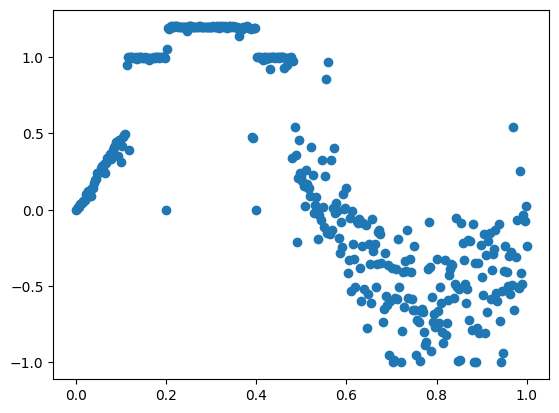

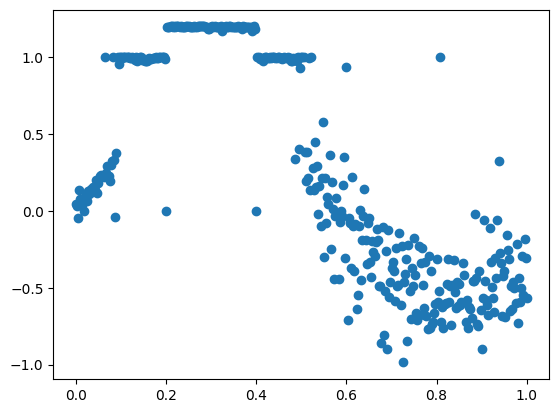

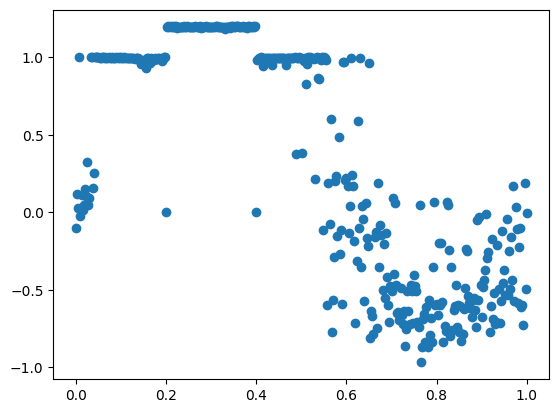

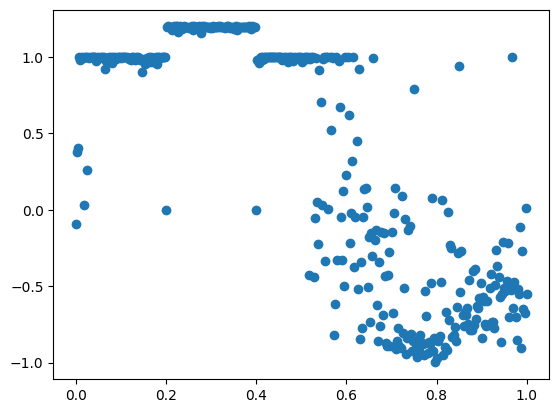

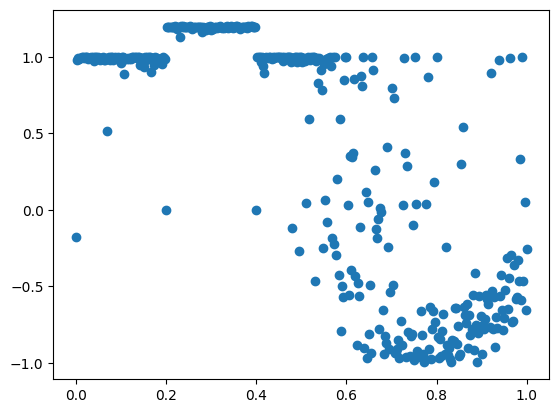

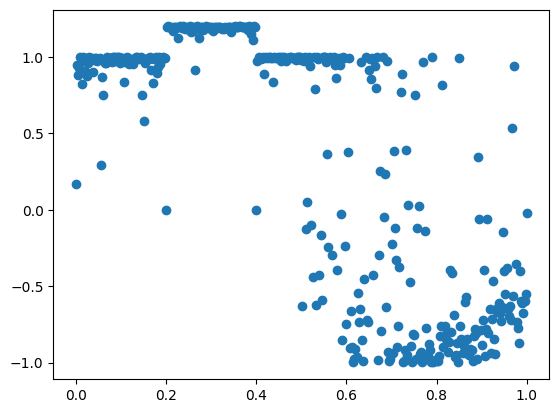

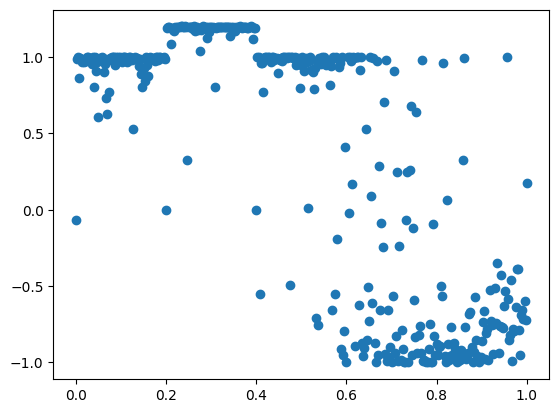

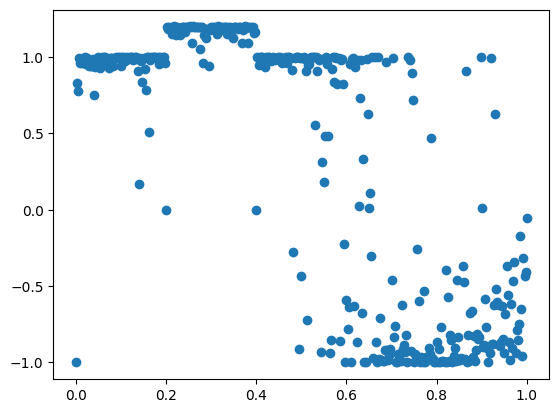

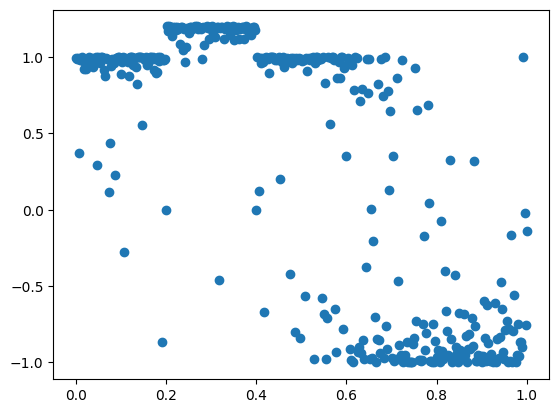

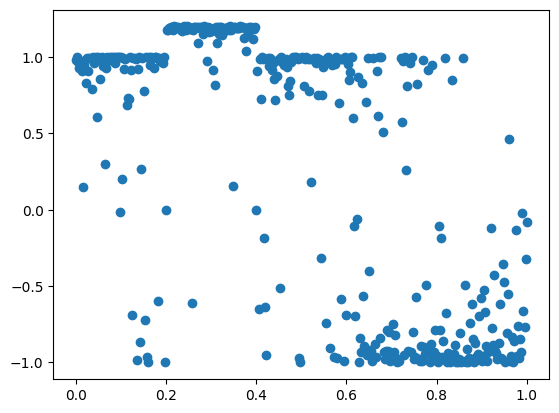

In [52]:
d=np.zeros((401))
g=np.zeros((401))
e=np.zeros((401))
e1=0
t=0
for j in range(0,20):
    for i in range(0,401):
           nn=NN(1,10,10,1,0.01)
           nn=nn.train(i*0.0025,math.sin(math.pi*2*(i*0.0025))+0.5*math.sin(math.pi*(i*0.0025)),t)
           d[i]=i*0.0025
           g[i]=nn
           e[i]=(nn-math.sin(math.pi*2*(i*0.0025))-0.5*math.sin(i*0.0025))**2
    fig=plt.figure()
    plt.scatter(d,g)
    t+=0.1
for i in range(0,400):
    e1=e1+e[i]
print(e1/400)